In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import files
uploaded = files.upload()


Saving fault_data.csv to fault_data.csv


In [7]:
import pandas as pd

# Load your actual file
df = pd.read_csv('fault_data.csv')

# Preview first 5 rows
print(df.head())


  Fault ID           Fault Type Fault Location (Latitude, Longitude)  \
0     F001        Line Breakage                 (34.0522, -118.2437)   
1     F002  Transformer Failure                   (34.056, -118.245)   
2     F003          Overheating                  (34.0525, -118.244)   
3     F004        Line Breakage                   (34.055, -118.242)   
4     F005  Transformer Failure                  (34.0545, -118.243)   

   Voltage (V)  Current (A)  Power Load (MW)  Temperature (°C)  \
0         2200          250               50                25   
1         1800          180               45                28   
2         2100          230               55                35   
3         2050          240               48                23   
4         1900          190               50                30   

   Wind Speed (km/h) Weather Condition Maintenance Status Component Health  \
0                 20             Clear          Scheduled           Normal   
1             

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Fault Type'] = le.fit_transform(df['Fault Type'])  # ✅ Corrected column name


In [10]:
X = df.drop('Fault Type', axis=1)
y = df['Fault Type']


In [11]:
df['Weather Condition'] = le.fit_transform(df['Weather Condition'])
df['Maintenance Status'] = le.fit_transform(df['Maintenance Status'])


In [12]:
df = df.apply(lambda col: le.fit_transform(col) if col.dtypes == 'object' else col)


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])


In [14]:
X = df.drop('Fault Type', axis=1)  # Features
y = df['Fault Type']               # Target


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10 15  9]
 [ 8 14 12]
 [11 11 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.29      0.32        34
           1       0.35      0.41      0.38        34
           2       0.36      0.35      0.36        34

    accuracy                           0.35       102
   macro avg       0.35      0.35      0.35       102
weighted avg       0.35      0.35      0.35       102



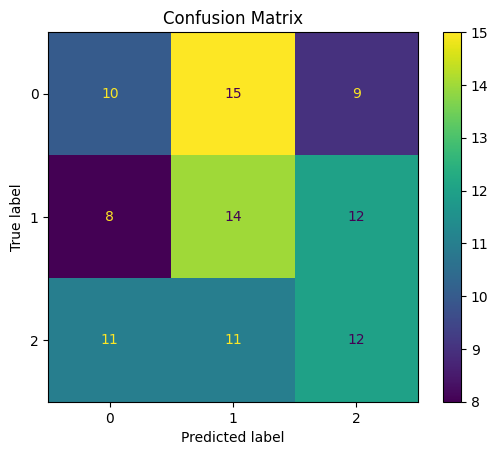

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


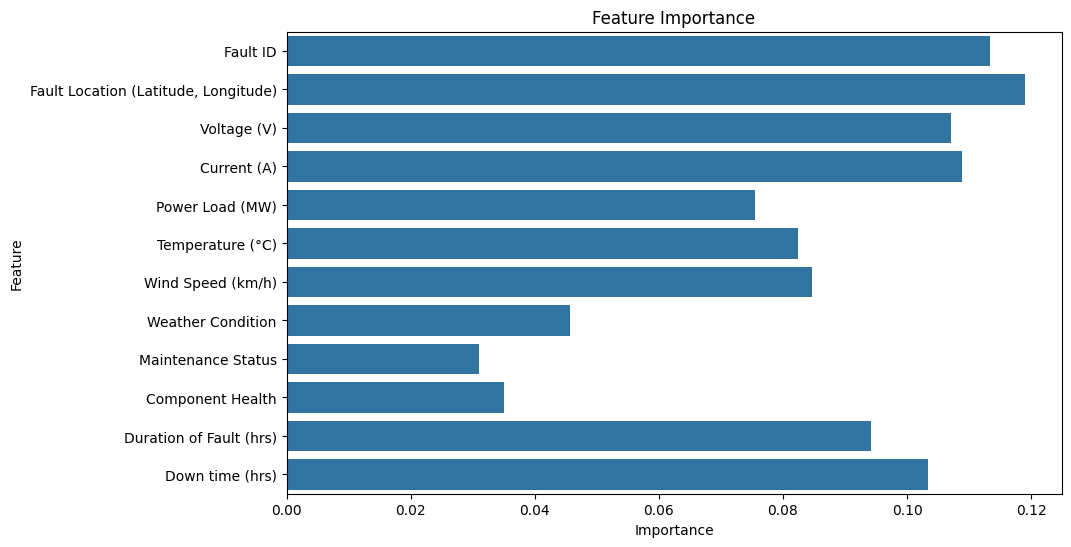

In [19]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [20]:
import joblib

joblib.dump(model, 'fault_detection_model.pkl')


['fault_detection_model.pkl']

In [21]:
# Create a DataFrame with actual and predicted labels
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save it
results.to_csv('prediction_results.csv', index=False)
print("Predictions saved to prediction_results.csv")


Predictions saved to prediction_results.csv
